In [1]:
import pandas as pd

df = pd.read_csv('output4.csv')

df.head()

,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience,min_size,max_size
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不需要融资,Y,Y,N,N,N,N,N,N,0,40,150,500
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,本科,不需要融资,N,N,N,N,N,N,N,N,1,3,15,50
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,本科,不需要融资,Y,Y,Y,N,N,N,N,N,3,5,50,150
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,本科,未知,N,N,Y,N,N,N,N,N,3,5,0,208000
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,本科,不需要融资,Y,N,Y,N,N,N,Y,N,5,10,0,15


In [2]:
df['salary'] = (df['min_salary'] + df['max_salary']) / 2

df = df.drop('company', axis=1)
df = df.drop('job', axis=1)
df = df.drop('min_salary', axis=1)
df = df.drop('max_salary', axis=1)

df.head()

,city,education,financing,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience,min_size,max_size,salary
0,郑州,不限,不需要融资,Y,Y,N,N,N,N,N,N,0,40,150,500,7000.0
1,上海,本科,不需要融资,N,N,N,N,N,N,N,N,1,3,15,50,14000.0
2,杭州,本科,不需要融资,Y,Y,Y,N,N,N,N,N,3,5,50,150,22500.0
3,南京,本科,未知,N,N,Y,N,N,N,N,N,3,5,0,208000,20000.0
4,上海,本科,不需要融资,Y,N,Y,N,N,N,Y,N,5,10,0,15,26500.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

y = df['salary']
X = df.drop('salary', axis=1)

# 对非数字列进行标签编码
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('训练集长度：', len(y_train))
print('测试集长度：', len(y_test))


训练集长度： 315
测试集长度： 79


In [4]:
rf = RandomForestRegressor(random_state=137)
param_grid = {
    'n_estimators': [100, 150, 200],  # 决策树的数量
    'max_depth': [None, 3, 4, 5, 6, 10],  # 树的最大深度
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)
r2 = r2_score(y_test, y_pred)
print("测试集的r2分数：", r2)


最佳参数组合： {'max_depth': 6, 'n_estimators': 100}
最佳模型的交叉验证R²分数： 0.25951913066047994
测试集的均方误差： 67312891.60257225
测试集的r2分数： 0.31975692510577136


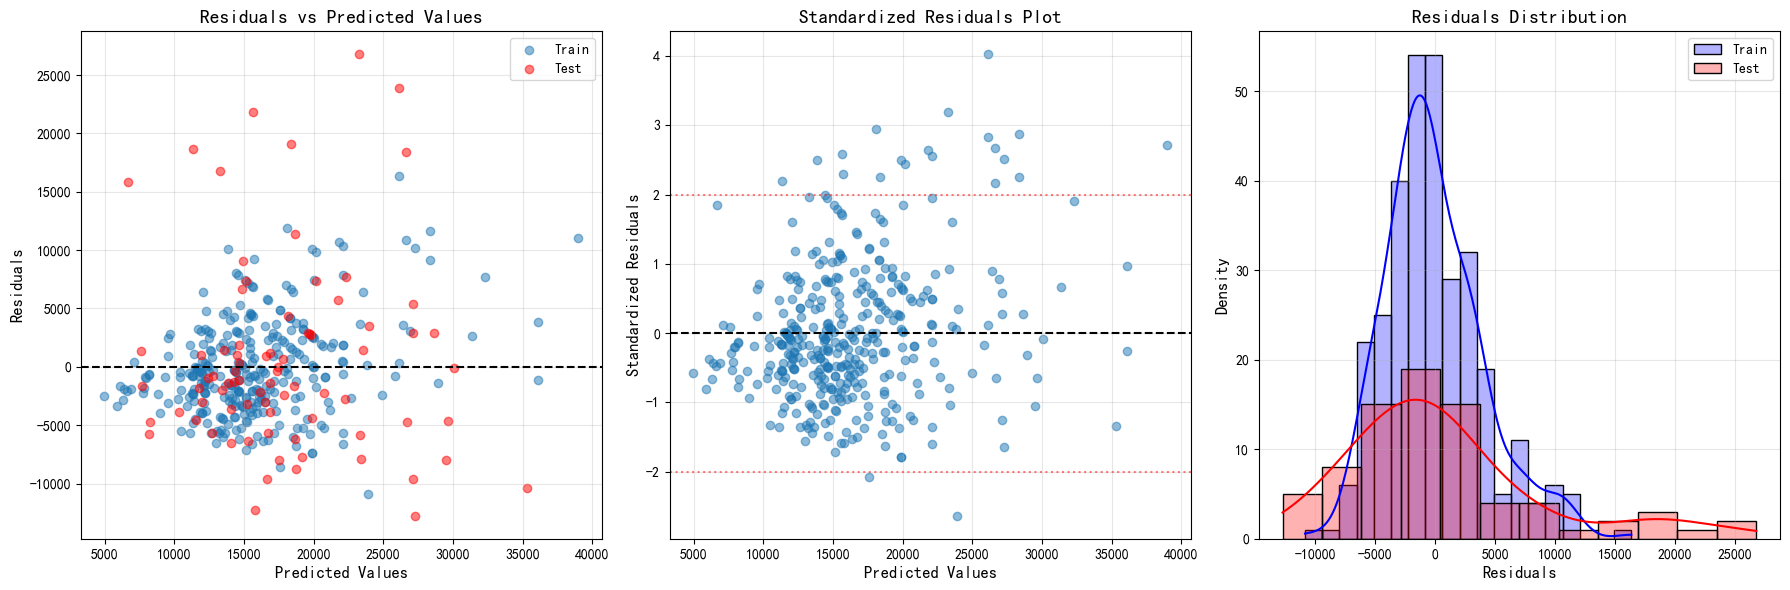

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

import numpy as np


# 计算训练集和测试集残差
y_pred_train = best_model.predict(X_train)

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
from sklearn.svm import SVR

rf = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],  # 正则化参数
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)
r2 = r2_score(y_test, y_pred)
print("测试集的r2分数：", r2)


最佳参数组合： {'C': 10000}
最佳模型的交叉验证R²分数： -0.0005089448965880594
测试集的均方误差： 110388092.77319816
测试集的r2分数： -0.1155476146099812


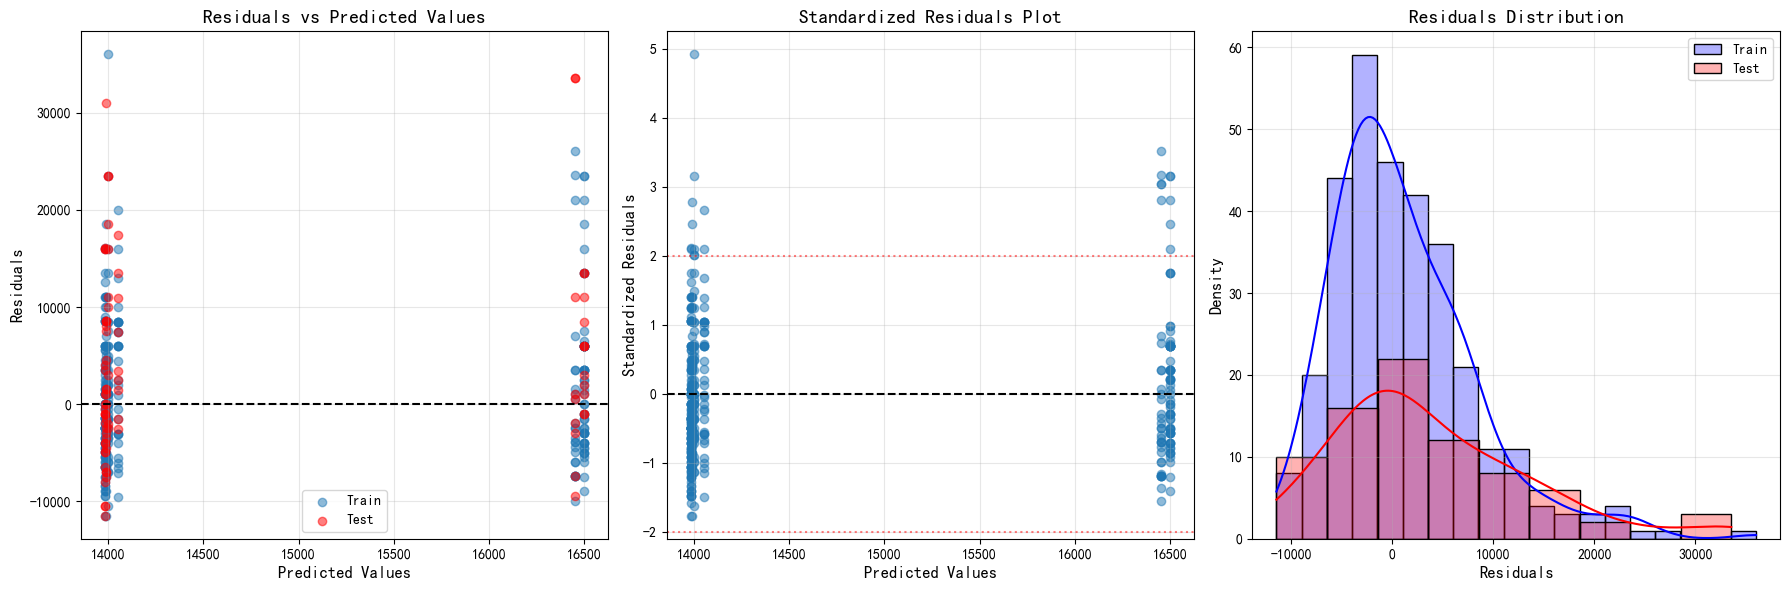

In [7]:
# 计算训练集和测试集残差
y_pred_train = best_model.predict(X_train)

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.neural_network import MLPRegressor

rf = MLPRegressor(max_iter=2500)
param_grid = {
    'hidden_layer_sizes': [(50,100, 50), (50, 50), (16, 32, 32, 16)],  # 隐藏层的神经元数量和结构
    'learning_rate_init': [0.001, 0.01]  # 初始学习率
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)
r2 = r2_score(y_test, y_pred)
print("测试集的r2分数：", r2)


最佳参数组合： {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}
最佳模型的交叉验证R²分数： 0.11071608784897513
测试集的均方误差： 80282994.44186698
测试集的r2分数： 0.1886851136437443


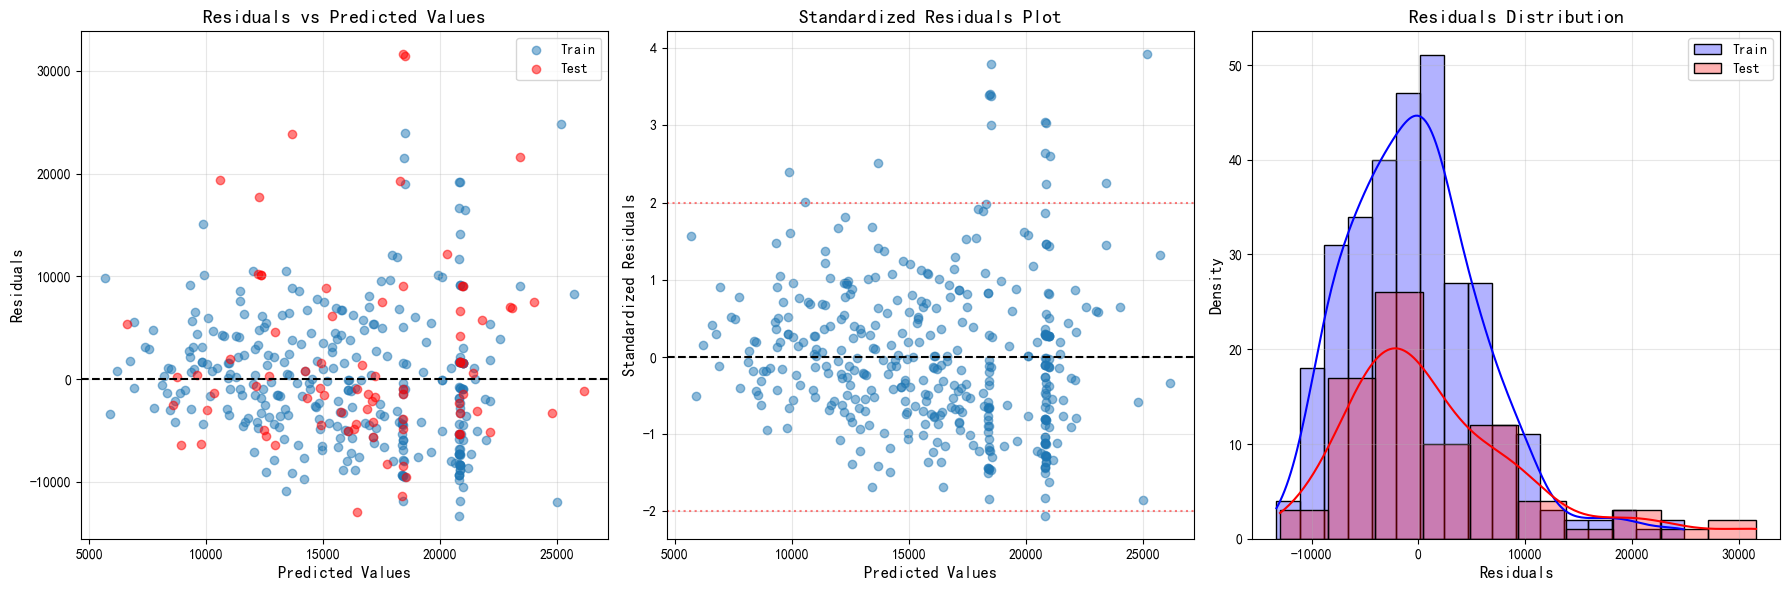

In [9]:
# 计算训练集和测试集残差
y_pred_train = best_model.predict(X_train)

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsRegressor

rf = KNeighborsRegressor()
param_grid = {
    'n_neighbors': range(3, 50)
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)
r2 = r2_score(y_test, y_pred)
print("测试集的r2分数：", r2)

最佳参数组合： {'n_neighbors': 11}
最佳模型的交叉验证R²分数： 0.08314789114357735
测试集的均方误差： 89902421.80144367
测试集的r2分数： 0.09147418286937736


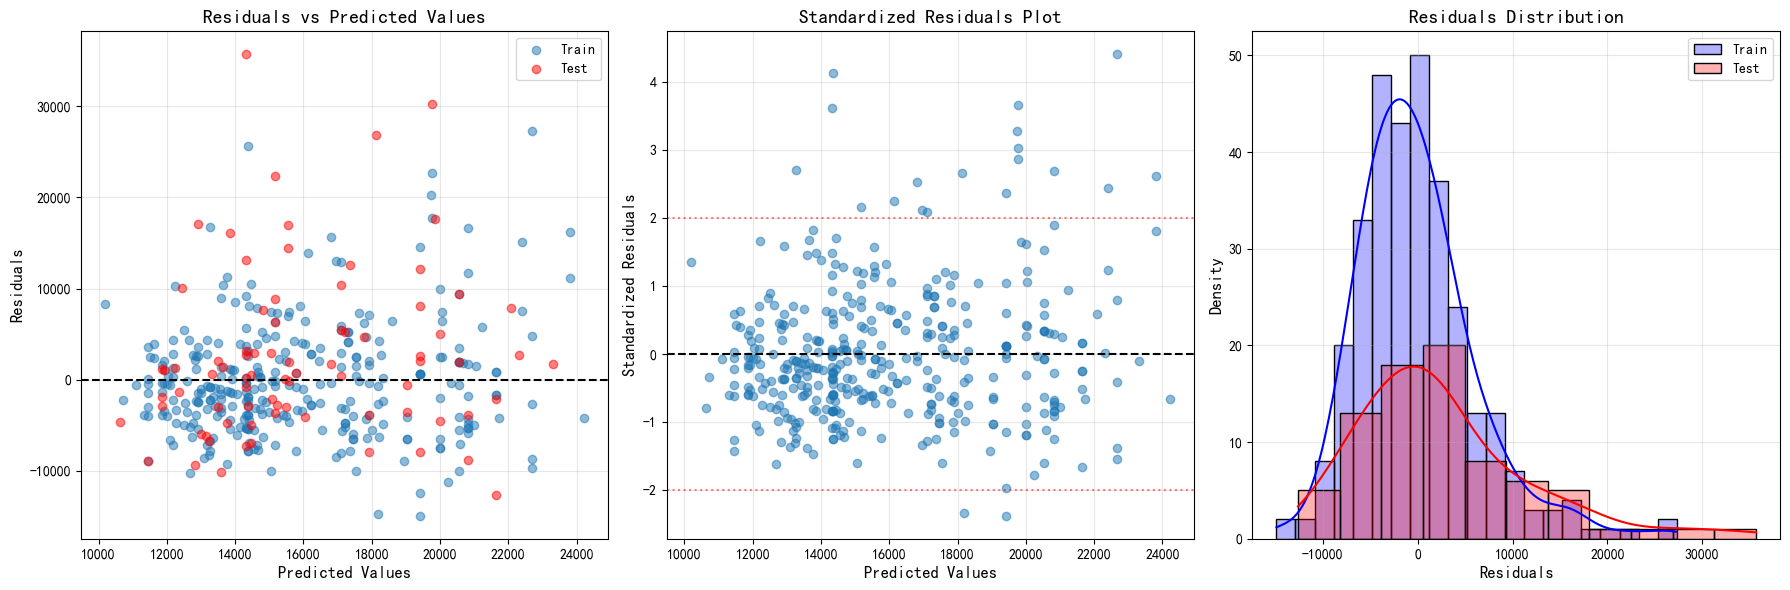

In [11]:
# 计算训练集和测试集残差
y_pred_train = best_model.predict(X_train)

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()